In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import scipy.io as scio
import matplotlib.pyplot as plt

In [2]:
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [19]:
mat = []
dat = []
ctsmat = []
N = 6.022*10**23
for i in range(3):
    mat.append(scio.loadmat('simul_out/'+str(90-10*i)+'-'+str(80-10*i)+'_ctsday_13880.mat'))
    dat.append(xr.open_dataset('ERA5/T_dt'+str(90-10*i))['t'])
    ctsmat.append(mat[i]['cts_save'])
p = mat[0].get('pint')[0]
# T = mat.get('temperature_int_save')


In [20]:
ctsmat2 = [np.zeros(3), np.array([1,2,3])]
np.ndim(ctsmat[0])

2

In [21]:
l = 6940
d = 36
ctsmat2 = [np.zeros((l, d)), np.zeros((l, d)), np.zeros((l, d))]
for i in range(3):
    for j in range(len(ctsmat[i])//2):
        temp = (ctsmat[i][2*j]+ctsmat[i][2*j+1])/2
        ctsmat2[i][j] = temp

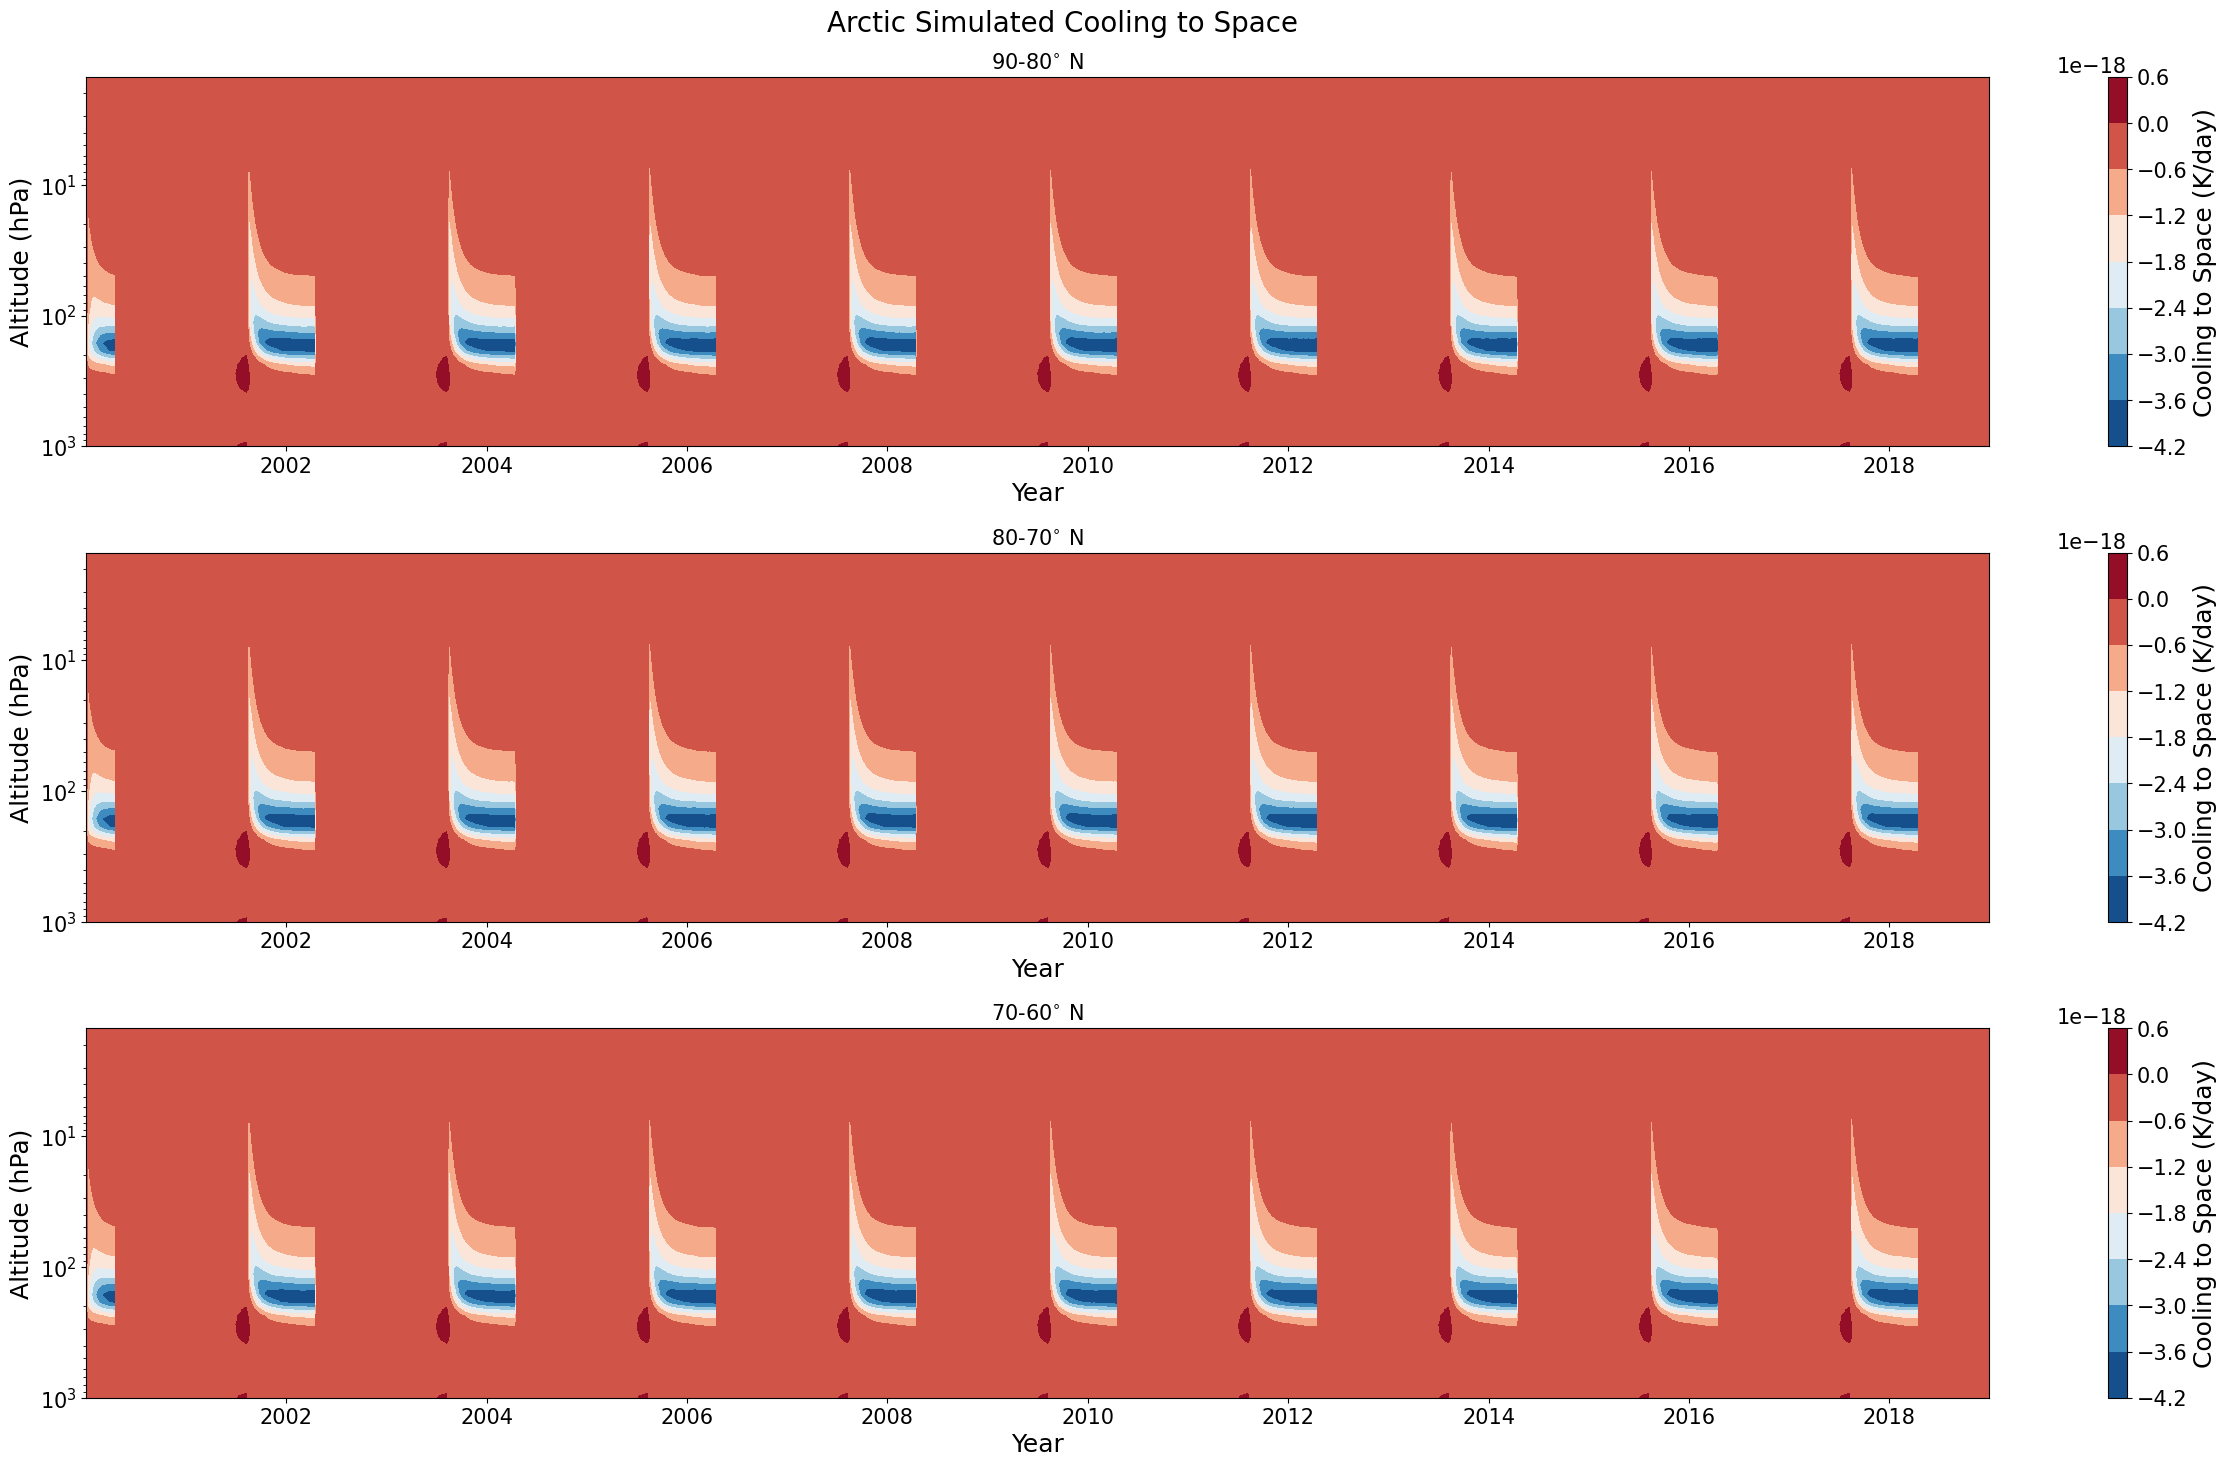

In [45]:
from matplotlib.colors import LogNorm  
fig, ax =  plt.subplots(3, 1, figsize=(25,15))
fig.suptitle('Arctic Simulated Cooling to Space', x=0.43)


for i in range(3):
    cs = ax[i].contourf(dat[0]['time'], p[:-1], ctsmat2[0].T, cmap='RdBu_r')
    ax[i].set_yscale('log')
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Altitude (hPa)')
    ax[i].set_title(r''+str(90-10*i)+'-'+str(80-10*i)+'$^{\circ}$ N')
    fig.colorbar(cs, label='Cooling to Space (K/day)', ax=ax[i])
    ax[i].invert_yaxis()
    
plt.tight_layout()
fig.savefig('Plots/CTS_Arctic_decadal.png', bbox_inches='tight')